In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.axis('off')
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.axis('off')
    plt.title(title_2)
    plt.show()

In [28]:
def plot_hist(old_image, new_image,title_old="Orignal", title_new="New Image"):
    intensity_values=np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    plt.bar(intensity_values, cv2.calcHist([old_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_old)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    plt.bar(intensity_values, cv2.calcHist([new_image],[0],None,[256],[0,256])[:,0],width = 5)
    plt.title(title_new)
    plt.xlabel('intensity')
    plt.show()

1. Load the RGB image

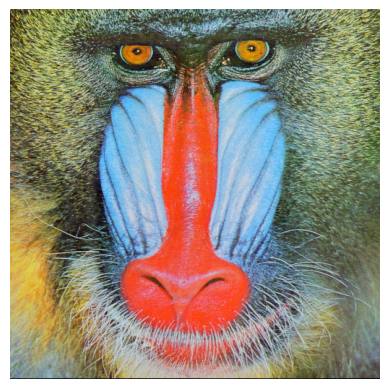

In [13]:
baboon = cv2.imread("baboon.png")
baboon = cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB)

plt.imshow(baboon)
plt.axis('off')
plt.show()

2. Create and display histograms

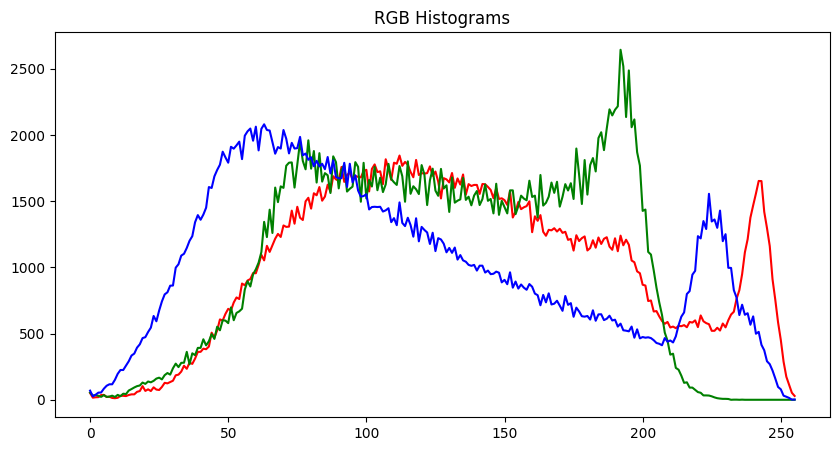

In [17]:
colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 5))
for i, col in enumerate(colors):
    hist = cv2.calcHist([baboon], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
plt.title("RGB Histograms")
plt.show()

3. Apply intensity transformations

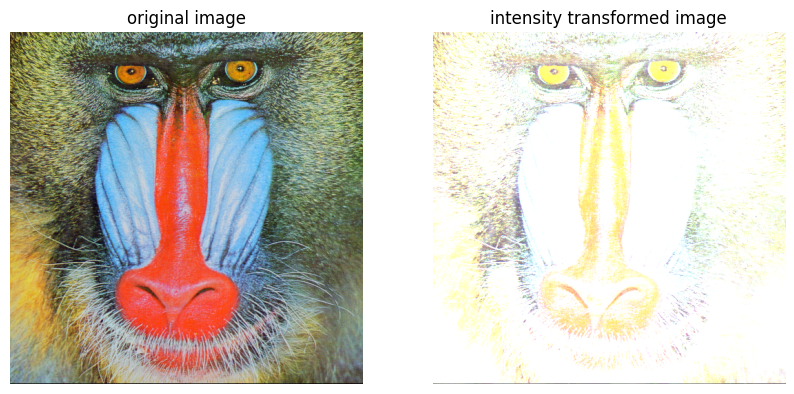

In [22]:
alpha = 2
beta = 100 
transformed_img = cv2.convertScaleAbs(baboon, alpha=alpha, beta=beta)

plot_image(baboon, transformed_img, "original image", "intensity transformed image")

4. Adjust brightness and contrast

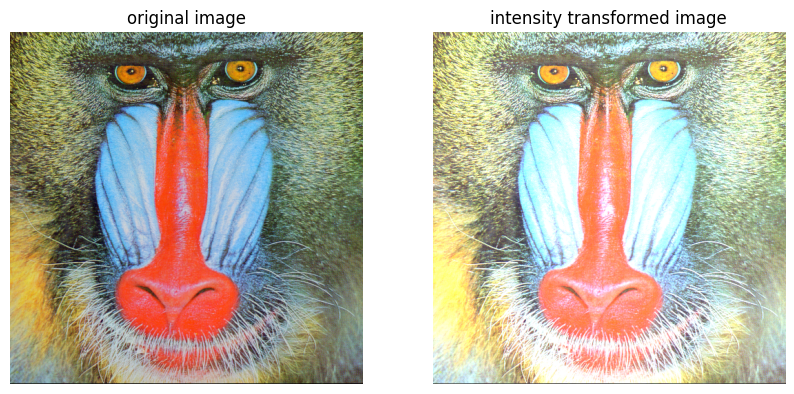

In [27]:
alpha = 1.2
beta = 50
adjusted_img = cv2.convertScaleAbs(baboon, alpha=alpha, beta=beta)

plot_image(baboon, adjusted_img, "original image", "intensity transformed image")

5. Perform histogram equalization

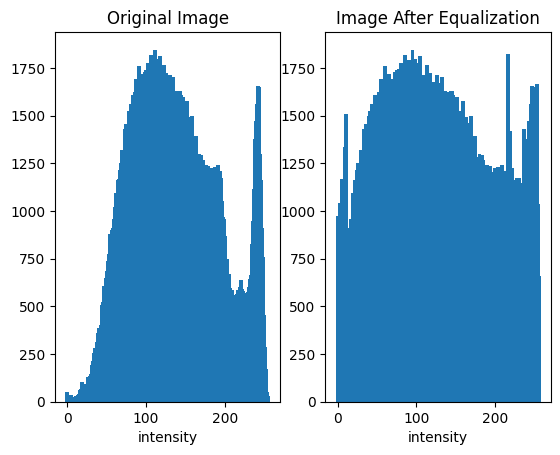

In [30]:
channels = cv2.split(baboon)
eq_channels = [cv2.equalizeHist(ch) for ch in channels]
eq_img = cv2.merge(eq_channels)

plot_hist(baboon, eq_img, "Original Image", "Image After Equalization")

6. Convert the image to grayscale

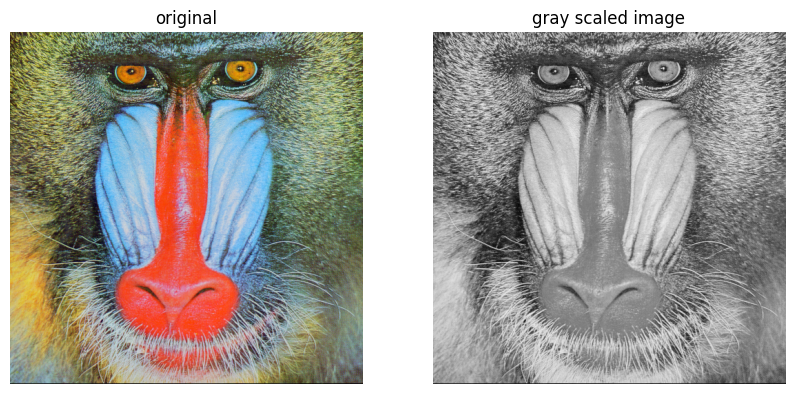

In [34]:
gray_scaled_img = cv2.cvtColor(baboon,cv2.COLOR_RGB2GRAY)

plot_image(baboon, gray_scaled_img, "original", "gray scaled image")

7. Apply Otsu’s thresholding

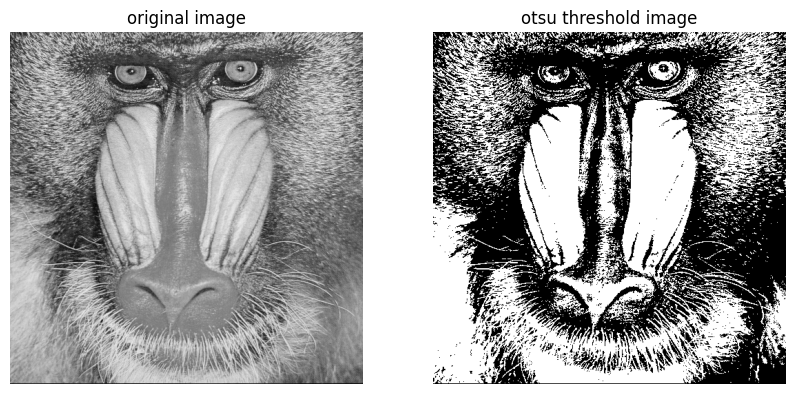

In [40]:
_, otsu_thresh = cv2.threshold(gray_scaled_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plot_image(gray_scaled_img, otsu_thresh, "original image", "otsu threshold image")